In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
crabs_df= pd.read_csv(r'C:\Users\Admin\Downloads\hoc sau\DuLieu\DuLieu\crabs.txt',sep='\s+',header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1820\1797364187.py:1: SyntaxWarning: invalid escape sequence '\s'
  crabs_df= pd.read_csv(r'C:\Users\Admin\Downloads\hoc sau\DuLieu\DuLieu\crabs.txt',sep='\s+',header=None)


In [122]:
crabs_df.columns = ['presz', 'postsz', 'inc', 'year', 'lf']

In [123]:
crabs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   presz   473 non-null    object
 1   postsz  473 non-null    object
 2   inc     473 non-null    object
 3   year    362 non-null    object
 4   lf      473 non-null    object
dtypes: object(5)
memory usage: 18.6+ KB


In [124]:
# Chuyển đổi kiểu dữ liệu phù hợp
crabs_df['presz'] = pd.to_numeric(crabs_df['presz'], errors='coerce')
crabs_df['postsz'] = pd.to_numeric(crabs_df['postsz'], errors='coerce')
crabs_df['inc'] = pd.to_numeric(crabs_df['inc'], errors='coerce')

In [125]:
crabs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   presz   472 non-null    float64
 1   postsz  472 non-null    float64
 2   inc     472 non-null    float64
 3   year    362 non-null    object 
 4   lf      473 non-null    object 
dtypes: float64(3), object(2)
memory usage: 18.6+ KB


Dùng python để vẽ scatter plot thể hiện mối tƣơng quan giữa postmolt và premolt

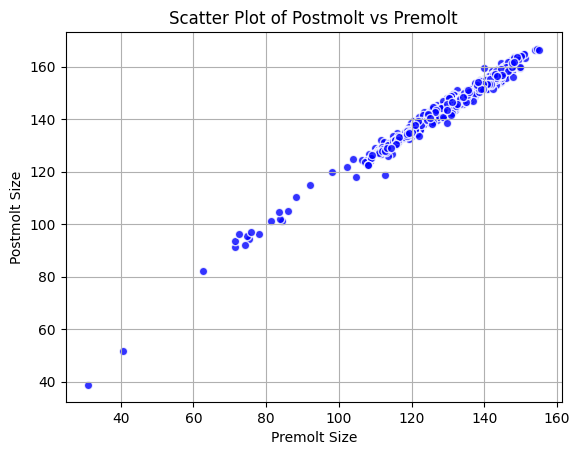

In [126]:
plt.scatter(crabs_df['presz'], crabs_df['postsz'], alpha=0.8, c='blue', edgecolors='w')
plt.title('Scatter Plot of Postmolt vs Premolt')
plt.xlabel('Premolt Size')
plt.ylabel('Postmolt Size')
plt.grid(True)
plt.show()

Nhận xét: dữ liệu tập trung theo dạng đường thẳng

2. Tính hệ số tương quan giữa postmolt và premolt

In [127]:
# Kiểm tra dữ liệu thiếu
missing_values = crabs_df[['presz', 'postsz']].isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:")
print(missing_values)

Số lượng giá trị thiếu trong từng cột:
presz     1
postsz    1
dtype: int64


In [128]:
# Xử lý dữ liệu thiếu bằng cách thay thế bằng trung bình
mean_presz = crabs_df['presz'].mean()
mean_postsz = crabs_df['postsz'].mean()
crabs_df['presz'].fillna(mean_presz, inplace=True)
crabs_df['postsz'].fillna(mean_postsz, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1820\545724818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crabs_df['presz'].fillna(mean_presz, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1820\545724818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [129]:
corr_matrix = np.corrcoef(crabs_df['postsz'], crabs_df['presz'])
# Trích xuất hệ số tương quan giữa 'presz' và 'postsz'
corr_coeff = corr_matrix[0, 1]
print(f"Hệ số tương quan giữa postmolt và premolt: {corr_coeff}")


Hệ số tương quan giữa postmolt và premolt: 0.9903699282533852


Nhận xét: Hệ số tương quan là 0.9903699282533851, có giá trị gần với 1, P-value=0.0 < α (0.05) nghĩa là giữa 2 đại lượng Postmolt và Premolt có mối quan hệ tuyến tính mạnh, mối quan hệ này có ý nghĩa thống kê.

3. Xây dựng phương trình hồi quy tuyến tính

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử crabs_df là DataFrame của bạn với các cột 'presz' và 'postsz' đã được chuyển sang kiểu float
# X và y để mô hình hóa
X = crabs_df[['presz']]  # Đặc trưng (premolt)
y = crabs_df['postsz']    # Mục tiêu (postmolt)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Linear Regression
model = LinearRegression()

# Luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Sai số bình phương trung bình: {mse}")
print(f"Điểm R^2: {r2}")

# Các hệ số
print("Các hệ số:", model.coef_)
print("Intercept:", model.intercept_)


Sai số bình phương trung bình: 3.755278664215508
Điểm R^2: 0.9714784381753099
Các hệ số: [0.92033121]
Intercept: 24.952508291164378


4. Kiểm định phương trình hồi quy tuyến tính

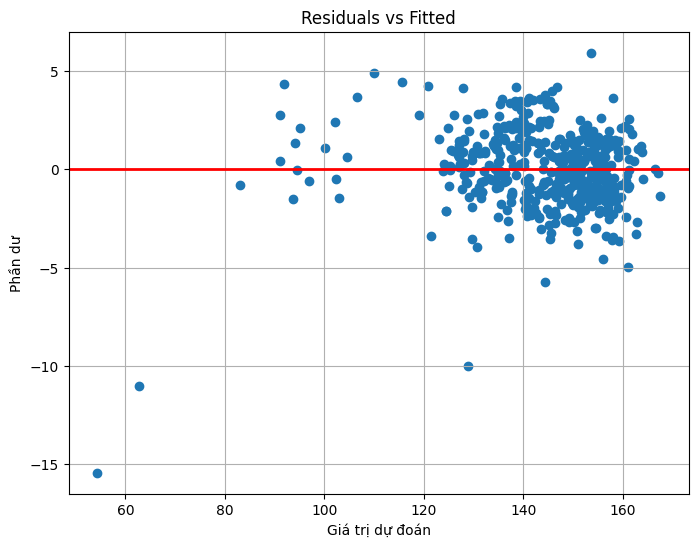

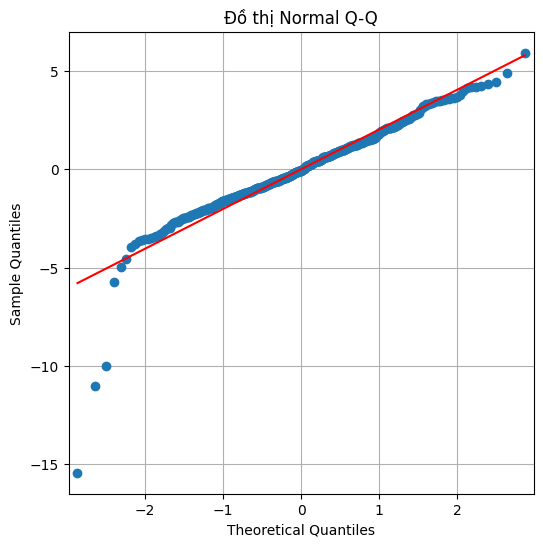

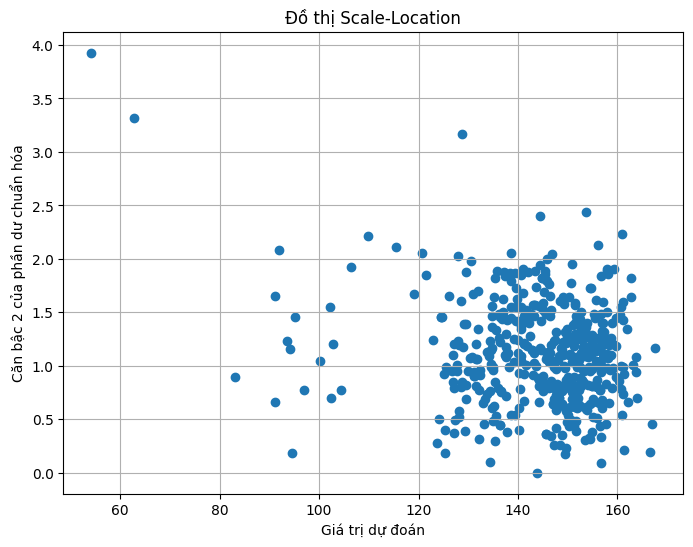

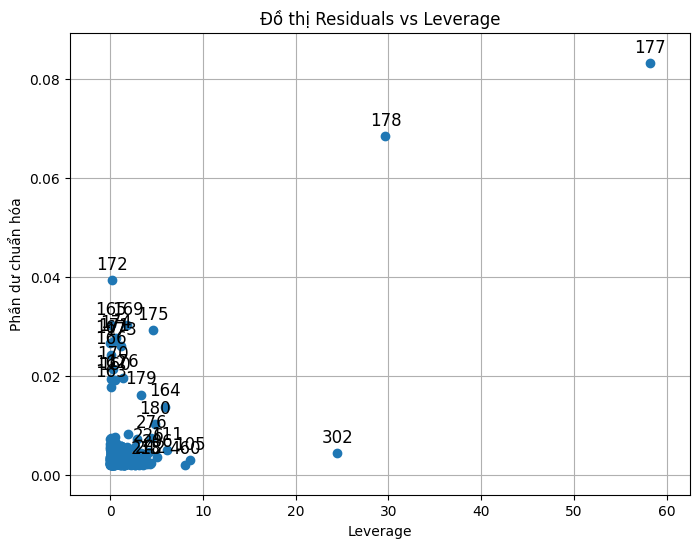

                            OLS Regression Results                            
Dep. Variable:                 postsz   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.410e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:57:43   Log-Likelihood:                -1004.3
No. Observations:                 473   AIC:                             2013.
Df Residuals:                     471   BIC:                             2021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8026      0.766     33.668      0.0

In [131]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Giả sử crabs_df là DataFrame của bạn với các cột 'presz' và 'postsz' đã được chuyển sang kiểu float
X = crabs_df[['presz']]  # Đặc trưng (premolt)
y = crabs_df['postsz']   # Mục tiêu (postmolt)

# Thêm hằng số vào X để tính intercept
X = sm.add_constant(X)

# Lập mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Đồ thị Residuals vs Fitted
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals vs Fitted')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Phần dư')
plt.grid(True)
plt.show()

# Đồ thị Normal Q-Q
residuals = model.resid
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=ax)
plt.title('Đồ thị Normal Q-Q')
plt.grid(True)
plt.show()

# Đồ thị Scale-location
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, np.sqrt(np.abs(residuals)))
plt.title('Đồ thị Scale-Location')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Căn bậc 2 của phần dư chuẩn hóa')
plt.grid(True)
plt.show()

# Đồ thị Residuals vs Leverage
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_leverage_resid2(model, ax=ax)
plt.title('Đồ thị Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Phần dư chuẩn hóa')
plt.grid(True)
plt.show()

# In tóm tắt về mô hình hồi quy tuyến tính
print(model.summary())


5. Tính khoảng sai số khi dự đoán

In [132]:
# Ước lượng các hệ số β0 và β1 với độ tin cậy 95%
conf_int = model.conf_int(alpha=0.05)
conf_int.columns = ['Lower', 'Upper']

# In ra khoảng tin cậy cho β0 và β1
print("\nKhoảng tin cậy cho hệ số β0 là từ {:.3f} đến {:.3f}".format(conf_int.loc['const', 'Lower'], conf_int.loc['const', 'Upper']))
print("Khoảng tin cậy cho hệ số β1 là từ {:.3f} đến {:.3f}".format(conf_int.loc['presz', 'Lower'], conf_int.loc['presz', 'Upper']))



Khoảng tin cậy cho hệ số β0 là từ 24.297 đến 27.309
Khoảng tin cậy cho hệ số β1 là từ 0.902 đến 0.926


6. Xác định và xử lý các giá trị có ảnh hưởng đến phương trình hồi quy

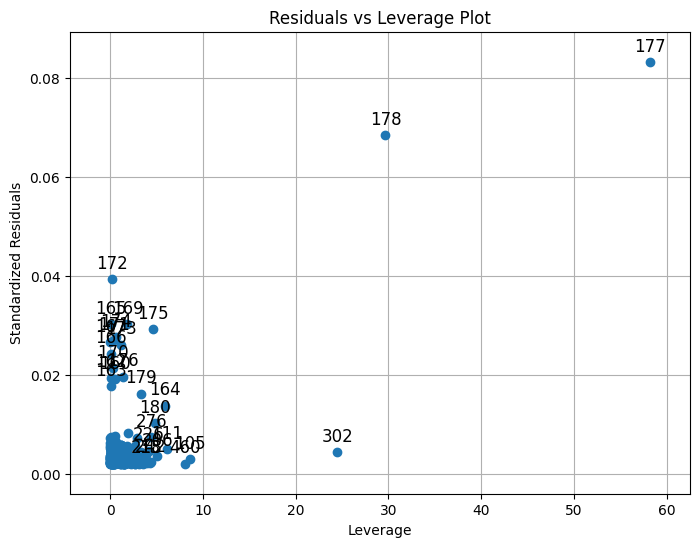

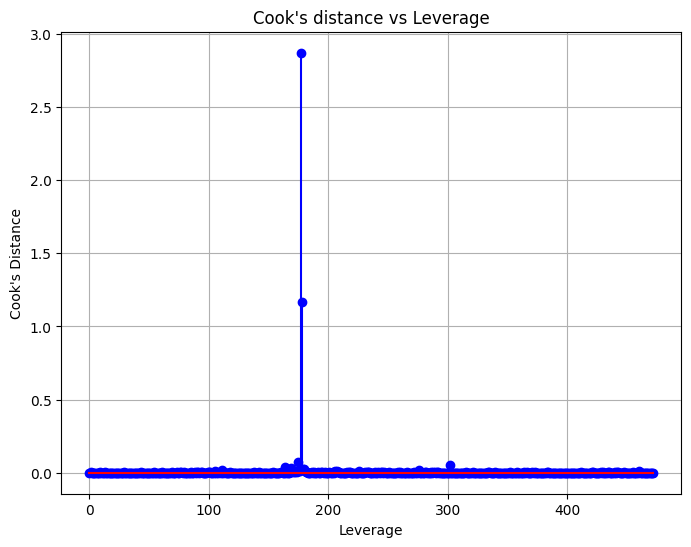

Influential points (outliers): [105 111 164 169 173 175 176 177 178 179 180 206 207 226 276 302 460]


In [133]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.outliers_influence as oi

# Assume crabs_df is your DataFrame with columns 'presz' and 'postsz' converted to float
X = crabs_df[['presz']]  # Feature (premolt)
y = crabs_df['postsz']   # Target (postmolt)

# Add constant to X for intercept
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()

# Compute influence measures
influence = model.get_influence()

# Plot Residuals vs Leverage
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_leverage_resid2(model, ax=ax)
plt.title('Residuals vs Leverage Plot')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.show()

# Calculate Cook's distance
cook_d2, pvals = influence.cooks_distance

# Plot Cook's distance vs Leverage
plt.figure(figsize=(8, 6))
plt.stem(cook_d2, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("Cook's distance vs Leverage")
plt.xlabel('Leverage')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

# Determine influential points using threshold (e.g., 4/(n - k - 1))
n = len(y)
k = X.shape[1] - 1  # Number of coefficients (excluding intercept)
threshold = 4 / (n - k - 1)
outliers = np.where(cook_d2 > threshold)[0]
print("Influential points (outliers):", outliers)


In [134]:
# Loại bỏ các điểm ảnh hưởng từ X và y
X_new = X.drop(index=outliers)
y_new = y.drop(index=outliers)

# Xây dựng mô hình hồi quy mới
model_new = sm.OLS(y_new, X_new).fit()

# In ra bảng tóm tắt về mô hình mới
print(model_new.summary())


                            OLS Regression Results                            
Dep. Variable:                 postsz   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.514e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:57:43   Log-Likelihood:                -867.21
No. Observations:                 456   AIC:                             1738.
Df Residuals:                     454   BIC:                             1747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0363      0.742     37.791      0.0

In [135]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Giả sử crabs_df là DataFrame của bạn với các cột 'presz' và 'postsz' đã được chuyển sang kiểu float
X = crabs_df[['presz']]  # Đặc trưng (premolt)
y = crabs_df['postsz']   # Mục tiêu (postmolt)

# Thêm hằng số vào X để tính intercept
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Giá trị postmolt size cần dự đoán
postmolt_size = 85

# Tính giá trị dự đoán premolt size
X_pred = sm.add_constant(np.array([[1, postmolt_size]]))  # Thêm hằng số vào để tính intercept
pred = model.predict(X_pred)

# Độ tin cậy 95%
alpha = 0.05

# Tính khoảng tin cậy
pred_var = model.get_prediction(X_pred).var_resid
pred_std = np.sqrt(pred_var)
t_value = stats.t.ppf(1 - alpha/2, model.df_resid)
ci_lower, ci_upper = pred - t_value * pred_std, pred + t_value * pred_std

# In kết quả
print(f'Giá trị dự đoán premolt size: {pred[0]:.2f}')
print(f'Khoảng tin cậy 95%: [{ci_lower[0]:.2f}, {ci_upper[0]:.2f}]')


Giá trị dự đoán premolt size: 103.49
Khoảng tin cậy 95%: [99.51, 107.47]
